In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\edyoda\Project\Q-3\Shopping_Revenue.csv")

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
df.drop("Id",axis=1, inplace=True) # Column Id is just Index

In [5]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [6]:
df.shape

(137, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [8]:
#get establisherd year
df['Established Year'] = 2023 - df['Open Date'].str.split('/',expand=True)[2].apply(int)
df.drop('Open Date',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              137 non-null    object 
 1   City Group        137 non-null    object 
 2   Type              137 non-null    object 
 3   P1                137 non-null    int64  
 4   P2                137 non-null    float64
 5   P3                137 non-null    float64
 6   P4                137 non-null    float64
 7   P5                137 non-null    int64  
 8   P6                133 non-null    float64
 9   P7                133 non-null    float64
 10  P8                137 non-null    int64  
 11  P9                137 non-null    int64  
 12  P10               137 non-null    int64  
 13  P11               137 non-null    int64  
 14  P12               137 non-null    int64  
 15  P13               137 non-null    float64
 16  P14               137 non-null    int64  
 1

In [10]:
df.isnull().sum().sort_values(ascending=False).head(5)

P6      4
P7      4
City    0
P30     0
P22     0
dtype: int64

In [11]:
df.drop(['P6','P7'],axis=1,inplace=True)

<AxesSubplot:>

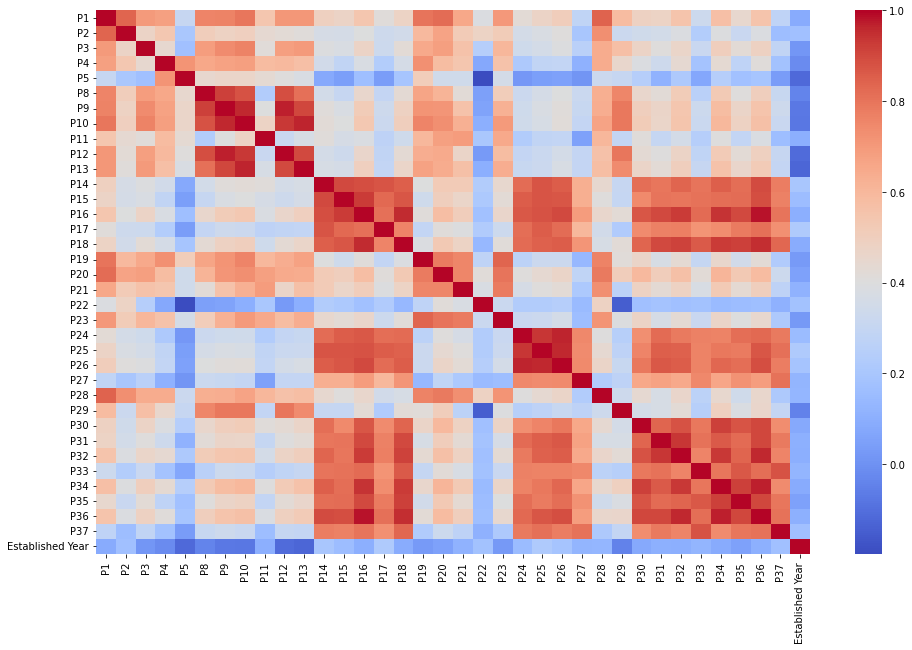

In [12]:
#correlation analysis
plt.figure(figsize = (16,10)) 
sns.heatmap(df.drop('revenue',axis=1).corr(),cmap='coolwarm')
#There is correlation among independent variables

In [13]:
#Categorical data analysis
print('No of distinct cities: {}' .format(df['City'].nunique()))
print('No of distinct city groups: {}' .format(df['City Group'].nunique()))
print('No of distinct types : {}' .format(df['Type'].nunique()))

No of distinct cities: 34
No of distinct city groups: 2
No of distinct types : 3


In [14]:
df.drop(['City'],axis=1,inplace=True)

<AxesSubplot:xlabel='City Group'>

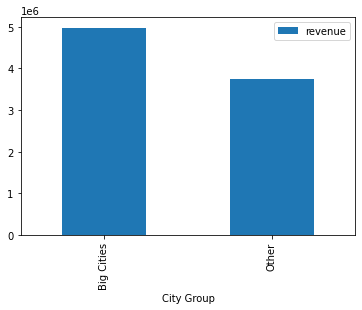

In [15]:
df.groupby(['City Group']).agg({'revenue':'mean'}).plot(kind='bar')

As we can see here, Big Cities has higher revenue

<AxesSubplot:xlabel='Type'>

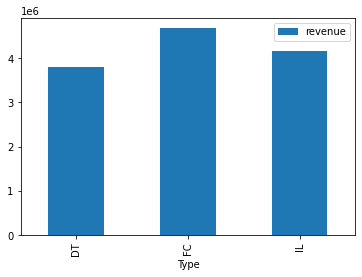

In [16]:
df.groupby('Type').agg({'revenue':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='City Group,Type'>

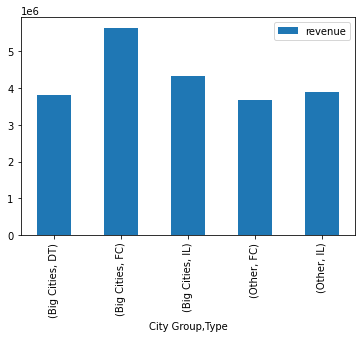

In [17]:
df.groupby(['City Group','Type']).agg({'revenue':'mean'}).plot(kind='bar')

In [18]:
type = pd.get_dummies(df['Type'],drop_first=True)
type

,FC,IL
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,0
135,1,0


In [19]:
city=pd.get_dummies(df['City Group'])['Big Cities']
city

0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    1
134    0
135    1
136    1
Name: Big Cities, Length: 137, dtype: uint8

In [20]:
df=pd.concat([df,city,type],axis=1)
df.drop(['Type','City Group'],axis=1,inplace=True)

In [21]:
df.head()

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P33,P34,P35,P36,P37,revenue,Established Year,Big Cities,FC,IL
0,4,5.0,4.0,4.0,2,4,5,5,3,5,...,5,5,4,3,4,5653753,24,1,0,1
1,4,5.0,4.0,4.0,1,5,5,5,1,5,...,0,0,0,0,0,6923131,15,1,1,0
2,2,4.0,2.0,5.0,2,5,5,5,2,5,...,0,0,0,0,0,2055379,10,0,0,1
3,6,4.5,6.0,6.0,4,8,10,10,8,10,...,6,18,12,12,6,2675511,11,0,0,1
4,3,4.0,3.0,4.0,2,5,5,5,2,5,...,2,3,4,3,3,4316715,14,0,0,1


In [22]:
#Devideing the data into train and tset
target='revenue'
features=df.drop(target,axis=1).columns
X=df[features]
y=df[target]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('feature training dataset shape='+str(X_train.shape))
print('feature test dataset shape='+str(X_test.shape))
print('output training dataset shape='+str(y_train.shape))
print('output test dataset shape='+str(y_test.shape))

# Models

# 1.LinearRegression

In [26]:
m1=LinearRegression()

scores=[]
for i in range(1,40):
    rfe = RFE(m1, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m1.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m1.predict(X_train_temp),y_train),mean_absolute_error(m1.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(25, 1154609.814764439, 2903153.0294895424),
 (27, 1155534.9144407047, 2893675.6467581107),
 (26, 1155669.3875204276, 2893517.953396351),
 (28, 1156252.8691396639, 2887707.196739543),
 (29, 1156939.0414165652, 2895282.024878361),
 (24, 1156946.985552799, 2888616.0232680487),
 (36, 1158813.4773167623, 2931822.748790345),
 (38, 1158989.7321439835, 2953278.855171845),
 (39, 1159027.7610926647, 2953257.897276572),
 (35, 1159213.2665033957, 2925249.135149688),
 (37, 1159441.1478985487, 2944165.527581978),
 (22, 1160700.3387115193, 2821232.3129434693),
 (21, 1161064.3990561909, 2790902.5630160053),
 (18, 1162562.6369550985, 2818740.639231317),
 (23, 1162667.3100792023, 2865953.2876249733),
 (33, 1165399.684730696, 2803604.5861776033),
 (34, 1165677.556329584, 2863139.585037233),
 (30, 1166667.38773356, 2813899.2865966153),
 (32, 1167989.9845112087, 2819855.7114959517),
 (19, 1171466.9443963694, 2820938.1422271878),
 (17, 1173066.0804640176, 2802118.644221178),
 (31, 1173336.1406441769, 2837

In [27]:
rfe = RFE(m1, n_features_to_select=25)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m1.fit(X_train_temp,y_train)

LinearRegression()

In [28]:
mean_absolute_error(m1.predict(X_test_temp),y_test)

2903153.0294895424

# 2.SVR

In [29]:
print(f'feature training dataset shape: {X_train.shape}')
print(f'feature test dataset shape: {X_test.shape}')
print(f'output training dataset shape: {y_train.shape}')
print(f'output test dataset shape: {y_test.shape}')

feature training dataset shape: (109, 39)
feature test dataset shape: (28, 39)
output training dataset shape: (109,)
output test dataset shape: (28,)


In [30]:
m2=Ridge()
scores=[]
for i in range(1,40):
    rfe = RFE(m2, n_features_to_select=i)             
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m2.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m2.predict(X_train_temp),y_train),mean_absolute_error(m2.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(26, 1147701.3543269087, 2795338.456305226),
 (28, 1147880.1316093083, 2795966.994284811),
 (29, 1147962.9229709504, 2795834.6757664117),
 (25, 1147970.5507803683, 2804903.0373253124),
 (27, 1148193.3898207042, 2799568.0533120213),
 (18, 1152916.9100487828, 2732572.3924767165),
 (22, 1153778.0453696903, 2748058.3554873844),
 (23, 1156446.311812156, 2788315.0391140087),
 (21, 1157323.5533932263, 2718959.814667558),
 (24, 1157893.3206157892, 2785813.305788466),
 (37, 1162022.4375703826, 2857112.1988944565),
 (39, 1162117.463117738, 2864715.1141752074),
 (38, 1162138.11756259, 2864495.813152608),
 (19, 1163280.4632621272, 2748197.7558637634),
 (36, 1164192.6714438046, 2842536.8381261644),
 (17, 1164663.3504264515, 2735038.432903893),
 (35, 1164981.6760929, 2841045.661779676),
 (16, 1165041.822637724, 2672384.256728981),
 (20, 1165984.8557214427, 2746480.8025991335),
 (34, 1176986.857497052, 2776385.3671537465),
 (33, 1177044.476029573, 2776400.1661985195),
 (32, 1179190.8303778144, 27164

In [31]:
rfe = RFE(Ridge(), n_features_to_select=26)             
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m2.fit(X_train_temp,y_train)

Ridge()

In [32]:
mean_absolute_error(m2.predict(X_test_temp),y_test)

2795338.456305226

# 3.Decision tree

In [33]:
DT_model = DecisionTreeRegressor(random_state=42)

In [36]:
m4=DecisionTreeRegressor(random_state=42)
m4

DecisionTreeRegressor(random_state=42)

In [34]:
params = {'max_depth': range(1, 25)}
params

{'max_depth': range(1, 25)}

In [35]:
tree = GridSearchCV(DT_model, params, cv=5, verbose=True)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 25)}, verbose=True)

In [37]:
mean_absolute_error(tree.predict(X_train),y_train)

1235712.5722921556

# 4.Random Forest Regressor

In [38]:
RFR_model = RandomForestRegressor()
RFR_model

RandomForestRegressor()

In [39]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21)}

In [40]:
rf= GridSearchCV(RFR_model, params, cv=5, verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [41]:
mean_absolute_error(rf.predict(X_train),y_train)

587712.6766436712

In [42]:
mean_absolute_error(rf.predict(X_test),y_test)

1902715.2792197743

# 5.Gradient Descent Regressor

In [43]:
GDR_model = GradientBoostingRegressor()
GDR_model

GradientBoostingRegressor()

In [44]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21),'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

In [48]:
gb = GridSearchCV(GDR_model, params, cv=5, verbose=True)
gb.fit(X_train, y_train)

Fitting 5 folds for each of 693 candidates, totalling 3465 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [49]:
mean_absolute_error(gb.predict(X_train),y_train)

1281465.4712254717

In [50]:
mean_absolute_error(gb.predict(X_test),y_test)

1891169.927214077

In [51]:
gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=14, n_estimators=20)

In [52]:
best_model=GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [53]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [54]:
feat_imp=best_model.feature_importances_
features=X_train.columns
importances=pd.Series(feat_imp,index=features).sort_values()

<AxesSubplot:>

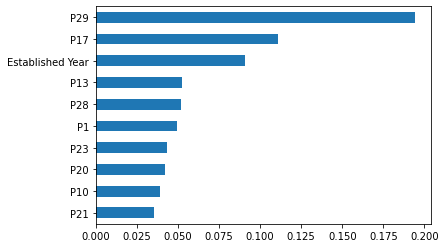

In [55]:
#10 best features
importances.tail(10).plot(kind='barh')